In [52]:
import random
import time
from matplotlib import pyplot as plt

In [53]:
class BinaryTreeNode:

    def __init__(self, key, value, parent=None):
        self.key = key
        self.value = value
        self.lc = None
        self.rc = None
        self.parent = parent
        self.setDepth()
    
    def __repr__(self):
        return f"Key: {self.key}, Value: {self.value} "
    def setParent(self, parent):
        self.parent = parent
        self.setDepth()

    def setDepth(self):
        depth = 0
        cur = self
        while cur.parent != None:
            cur = cur.parent
            depth += 1
        self.depth = depth
        return depth

    def setLC(self, node):
        self.lc = node
        node.setParent(self)
    
    def setRC(self, node):
        self.rc = node
        node.setParent(self)
    
    def getValue(self):
        return self.value
    
    def hasParent(self):
        #True if self.parent != None else False
        if self.parent == None:
            return False
        return True
    
    def hasChildren(self):
        if self.rc == None and self.lc == None:
            return False
        return True
    
    def replaceChild(self, newChild):
        if(newChild.key < self.key):
            self.lc = newChild
        else:
            self.rc = newChild

In [54]:
class BSTRee:
    def __init__(self, key, value):
        self.root = BinaryTreeNode(key, value)
        self.allNodes = {key: self.root}
    
    def clear(self):
        self.root = None
        self.allNodes = {}
    
    def add(self, key, value):
        newNode = BinaryTreeNode(key, value)
        self.allNodes[key] = newNode

        if self.root == None:
            self.root = newNode
            return
        
        if self.root.key == key:
            newNode.lc = self.root.lc
            newNode.rc = self.root.rc
            self.root = newNode
            return

        curNode = self.root
        while curNode.hasChildren():
            #if key matches a key already inserted
            if key == curNode.key:
                newNode.lc = curNode.lc
                newNode.rc = curNode.rc
                newNode.setParent(curNode.parent)
                curNode.parent.replaceChild(newNode)
                return
            parent = curNode

            if key > curNode.key:
                curNode = curNode.rc
            else:
                curNode = curNode.lc
            
            if curNode == None:
                newNode.setParent(parent)
                parent.replaceChild(newNode)
                return
        newNode.setParent(curNode)
        curNode.replaceChild(newNode)
        return


    def isRoot(self, node):
        return self.root.key == node.key
    
    
    def resetNode(self, oldNode, newNode):
        """
        if oldNode is root, replace root with new node
        otherwise, change old node's child from old node to new node
        """
        if self.isRoot(oldNode):
            self.root = newNode
            newNode.setParent(None)
            return
        oldNode.parent.replaceChild(newNode)
        newNode.setParent(oldNode.parent)
        
    
    

    def removeNode(self, key):
        if not self.hasKey(key):
            raise Exception(f"Key not found: {key}")
        
        if self.size() == 1:
            self.root = None
            return self.allNodes.pop(key)

        removedNode = self.allNodes[key]
        isRoot = self.root.key == key

        #case 1: if node has no children
        if not removedNode.hasChildren():
            removedNode.parent.replaceChild(removedNode)
            return self.allNodes.pop(key)
        
        #case 3: if node has 2 children
        if removedNode.lc != None and removedNode.rc != None:
            successor = self.getSuccessor(removedNode)
            
            self.resetNode(removedNode, successor)
            self.allNodes[successor.key] = successor
            return self.allNodes.pop(key)
        
        #case 2: if node has 1 child
        #subcase 1: 1 left child
        if removedNode.lc != None:
            self.resetNode(removedNode, removedNode.lc)
            removedNode.lc = None
            return self.allNodes.pop(key)
        
        #subcase 2: 1 right child
        if removedNode.rc != None:
            self.resetNode(removedNode, removedNode.rc)
            removedNode.rc = None
            return self.allNodes.pop(key)
        
    

    def remove(self, key):
        self.removeNode(key)
        for node in self.allNodes.values():
            node.setDepth()


    
    def getSuccessor(self, targetNode):

        successor = targetNode.rc
        while successor.lc != None:
            successor = successor.lc
        
        successor =  self.removeNode(successor.key)
        successor.lc = targetNode.lc
        successor.rc = targetNode.rc
        successor.lc.parent = successor
        successor.rc.parent = successor
        return successor

    
    def getDepth(self):
        return max(list(map(lambda node: node.getDepth(), self.allNodes.values())))
    
    def size(self):
        return len(self.allNodes)

    def hasKey(self, key):
        return True if key in self.allNodes else False
    
    def quickGet(self, key):
        if not self.hasKey(key):
            raise Exception(f"Key not found: {key}")
        return self.allNodes[key].getValue()
    
    def get(self, key, rootnode=None):
        if rootnode == None:
            rootnode = self.root
        if key == rootnode.key:
            return rootnode.getValue()
        
        if key > rootnode.key:
            rootnode = rootnode.rc
        elif key < rootnode.key:
            rootnode = rootnode.lc
        
        if rootnode == None:
            raise Exception(f"Key not found: {key}")
        
        return self.get(key, rootnode=rootnode)

    



In [55]:
from collections import deque

def print_bst_visual(tree):
    if not tree.root:
        print("The tree is empty.")
        return

    # Queue for level-order traversal
    queue = deque([(tree.root, 0)])  # (node, level)
    current_level = 0
    level_nodes = []

    while queue:
        node, level = queue.popleft()

        # If we move to a new level, print the previous level
        if level != current_level:
            print("Level", current_level, ":", " ".join(level_nodes))
            level_nodes = []
            current_level = level

        # Add the current node's key to the level's list
        level_nodes.append(str(node.key))

        # Add children to the queue
        if node.lc:
            queue.append((node.lc, level + 1))
        if node.rc:
            queue.append((node.rc, level + 1))

    # Print the last level
    if level_nodes:
        print("Level", current_level, ":", " ".join(level_nodes))

# Example usage
myTree = BSTRee(17, 17)
numbers = [10, 30, 5, 12, 18, 51, 19, 20]
for number in numbers:
    myTree.add(number, number)
print(myTree.allNodes)
myTree.remove(17)
myTree.remove(18)
print_bst_visual(myTree)

{17: Key: 17, Value: 17 , 10: Key: 10, Value: 10 , 30: Key: 30, Value: 30 , 5: Key: 5, Value: 5 , 12: Key: 12, Value: 12 , 18: Key: 18, Value: 18 , 51: Key: 51, Value: 51 , 19: Key: 19, Value: 19 , 20: Key: 20, Value: 20 }
Level 0 : 19
Level 1 : 10 30
Level 2 : 5 12 20 51


In [56]:
def generateRandomKeyList(len, max):
    return [random.randint(0, max) for _ in range(len)]

In [57]:
def avgInsertionTime(tree, items):
    tree.clear()
    times = [None] * (len(items))
    for idx, item in enumerate(items):
        start = time.time()
        tree.add(item, 1)
        end = time.time()
        times[idx] = end - start
    return sum(times) / len(times)

def avgRetrievalTime(tree, items):
    times = [None] * len(items)
    for idx, item in enumerate(items):
        start = time.time()
        tree.get(item)
        end = time.time()
        times[idx] = end - start
    return sum(times) / len(times)

In [58]:
#testing
items =  generateRandomKeyList(2000, 5000)
avgSortedInsertionTime = [None] * len(items)
avgUnsortedInsertionTime = [None] * len(items)
avgSortedRetrievalTime = [None] * len(items)
avgUnsortedRetrievalTime = [None] * len(items)
for i in range(1, len(items)):
    keys = items[:i]
    tree = BSTRee(-1, -1)
    avgUnsortedInsertionTime[i] = avgInsertionTime(tree, keys)
    avgUnsortedRetrievalTime[i] = avgRetrievalTime(tree, keys)
    keys.sort()
    avgSortedInsertionTime[i] = avgInsertionTime(tree, keys)
    avgSortedRetrievalTime[i] = avgRetrievalTime(tree, keys)

Text(0.5, 1.0, 'Average Unsorted Insertion Time')

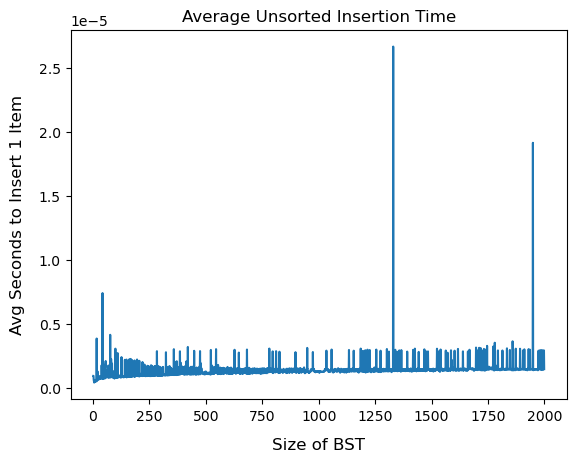

In [59]:
plt.plot(avgUnsortedInsertionTime)
plt.xlabel("Size of BST", fontsize=12, labelpad=10)
plt.ylabel("Avg Seconds to Insert 1 Item", fontsize=12, labelpad=10)
plt.title("Average Unsorted Insertion Time")

Text(0.5, 1.0, 'Average Unsorted Retrieval Time')

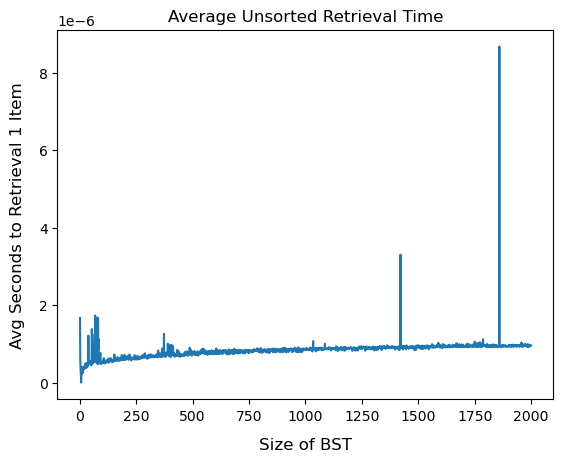

In [60]:
plt.plot(avgUnsortedRetrievalTime)
plt.xlabel("Size of BST", fontsize=12, labelpad=10)
plt.ylabel("Avg Seconds to Retrieval 1 Item", fontsize=12, labelpad=10)
plt.title("Average Unsorted Retrieval Time")

Text(0.5, 1.0, 'Avg Sorted Insertion Time')

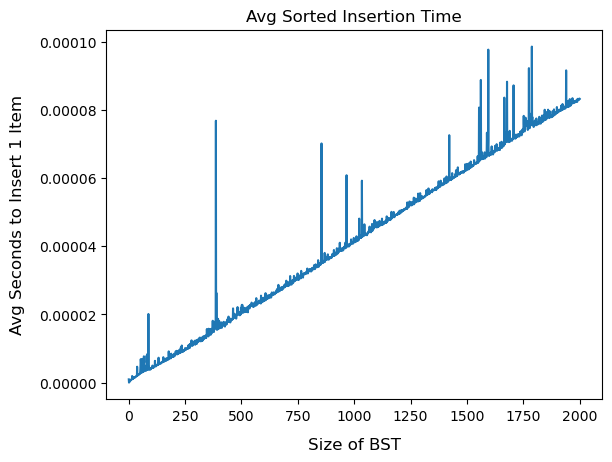

In [61]:
plt.plot(avgSortedInsertionTime)
plt.xlabel("Size of BST", fontsize=12, labelpad=10)
plt.ylabel("Avg Seconds to Insert 1 Item", fontsize=12, labelpad=10)
plt.title("Avg Sorted Insertion Time")

Text(0.5, 1.0, 'Avg Sorted Retrieval Time')

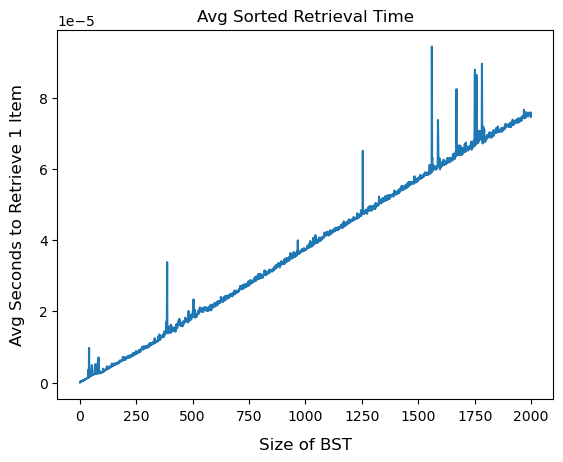

In [62]:
plt.plot(avgSortedRetrievalTime)
plt.xlabel("Size of BST", fontsize=12, labelpad=10)
plt.ylabel("Avg Seconds to Retrieve 1 Item", fontsize=12, labelpad=10)
plt.title("Avg Sorted Retrieval Time")